In [1]:
from fipy import * 
import numpy as np

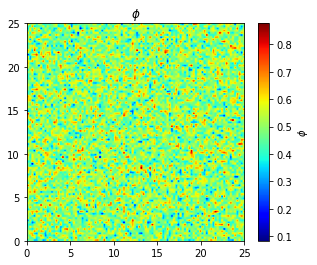

In [2]:
mesh = Grid2D(nx=100, ny=100, dx=0.25, dy=0.25)
phi = CellVariable(name=r"$\phi$", mesh=mesh)
phi.setValue(GaussianNoiseVariable(mesh=mesh, mean=0.5, variance=0.01))
viewer = Viewer(vars=(phi,),)

In [3]:
#PHI = phi.getArithmeticFaceValue()
D = a = eps = 1.
eq = (TransientTerm() == DiffusionTerm(coeff= D * a**2 * (1 - 6 * phi * (1-phi))) - DiffusionTerm(coeff=(D, eps**2)))
dexp = -5
elapsed = 0.
while elapsed < 1000.:
    dt = min(100, np.exp(dexp))
    print(dt,np.exp(dexp))
    elapsed += dt
    dexp += 0.01
    eq.solve(phi, dt=dt)
    viewer.plot()

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

In [4]:
elapsed

0.23455630964820717

In [5]:
viewer().plotMesh();

TypeError: 'Matplotlib2DGridViewer' object is not callable

In [4]:
r=np.random.negative_binomial(n=1, p=0.05)
r

25

In [2]:
import matplotlib.pyplot as plt
import collections
elements_count = collections.Counter(r)
plt.plot(elements_count.items())

NameError: name 'r' is not defined

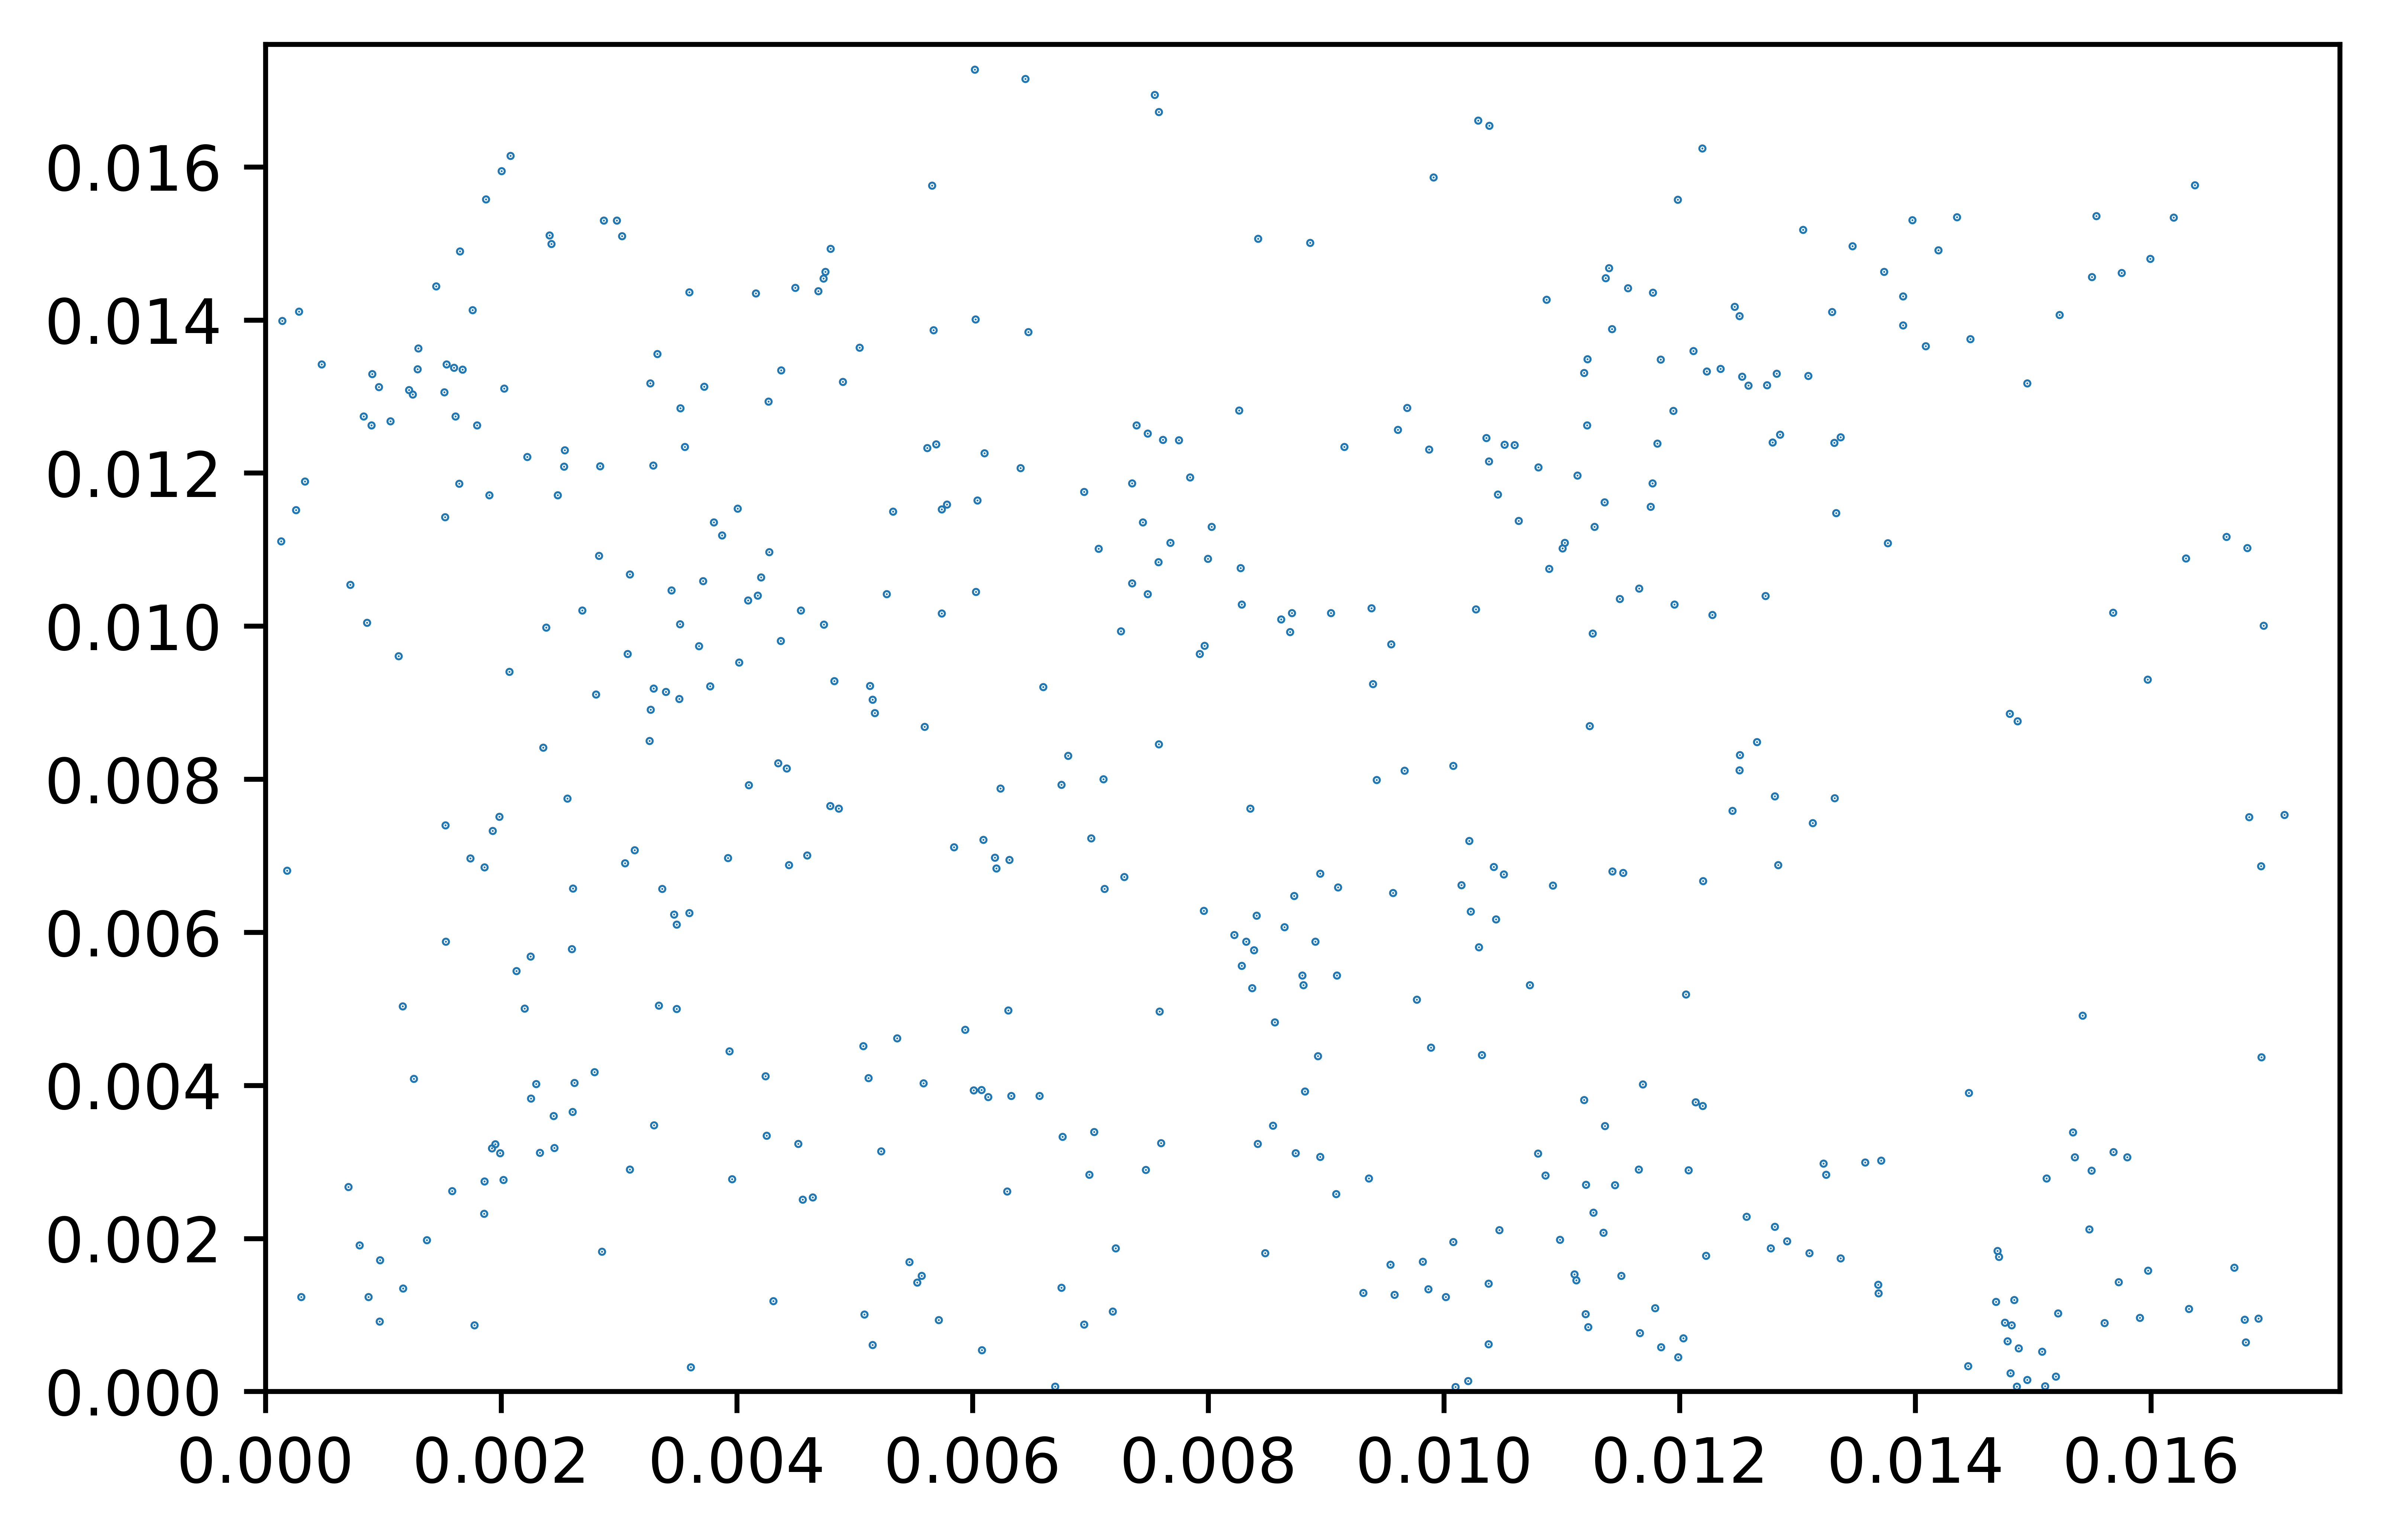

In [9]:
# generate random integer values
from random import seed
from random import randint

pos_x_inicial=randint(0, 10000)
pos_y_inicial=randint(0, 10000)
capsulas=100*100*0.22*0.22;
#capsulas=25
cap_pos_x=np.zeros(int(capsulas))
cap_pos_y=np.zeros(int(capsulas))

cap_pos_x[0]=pos_x_inicial
cap_pos_y[0]=pos_y_inicial

pos_x_actual=pos_x_inicial
pos_y_actual=pos_y_inicial
i=1
while i<capsulas:

    r=np.random.negative_binomial(n=1, p=0.0001)*0.1;
    theta=2*np.random.random()*np.pi;
    x_nuevo=np.int(r*np.cos(theta))+pos_x_actual;
    y_nuevo=np.int(r*np.sin(theta))+pos_y_actual;
    r_cap=30
    #print(not any(((x_nuevo+r_cap)>=cap_pos_x[:i])&(cap_pos_x[:i]>=(x_nuevo-r_cap))&((y_nuevo+r_cap)>=cap_pos_y[:i])&((y_nuevo-r_cap)<=cap_pos_y[:i])),(x_nuevo+r_cap<1000) & (y_nuevo+r_cap<1000) & (x_nuevo-r_cap>0) & (y_nuevo-r_cap>0))
    #print(x_nuevo,y_nuevo)
    if ((x_nuevo+r_cap<10000) & (y_nuevo+r_cap<10000) & (x_nuevo-r_cap>0) & (y_nuevo-r_cap>0)):
        #print('Entro 1')
        if  not any(((x_nuevo+r_cap)>=cap_pos_x[:i])&(cap_pos_x[:i]>=(x_nuevo-r_cap))&((y_nuevo+r_cap)>=cap_pos_y[:i])&((y_nuevo-r_cap)<=cap_pos_y[:i])):
        #print('Entro 2')
            cap_pos_x[i]=x_nuevo;
            cap_pos_y[i]=y_nuevo;
        
            pos_x_actual=x_nuevo;
            pos_y_actual=y_nuevo;
            i+=1
fig=plt.figure(dpi=1200)

cap_pos_x=0.0176*cap_pos_x/10000;
cap_pos_y=0.0176*cap_pos_y/10000;
plt.scatter(cap_pos_x,cap_pos_y,s=0.1)
plt.xlim([0,0.0176]);
plt.ylim([0,0.0176]);   


    


KeyboardInterrupt: 

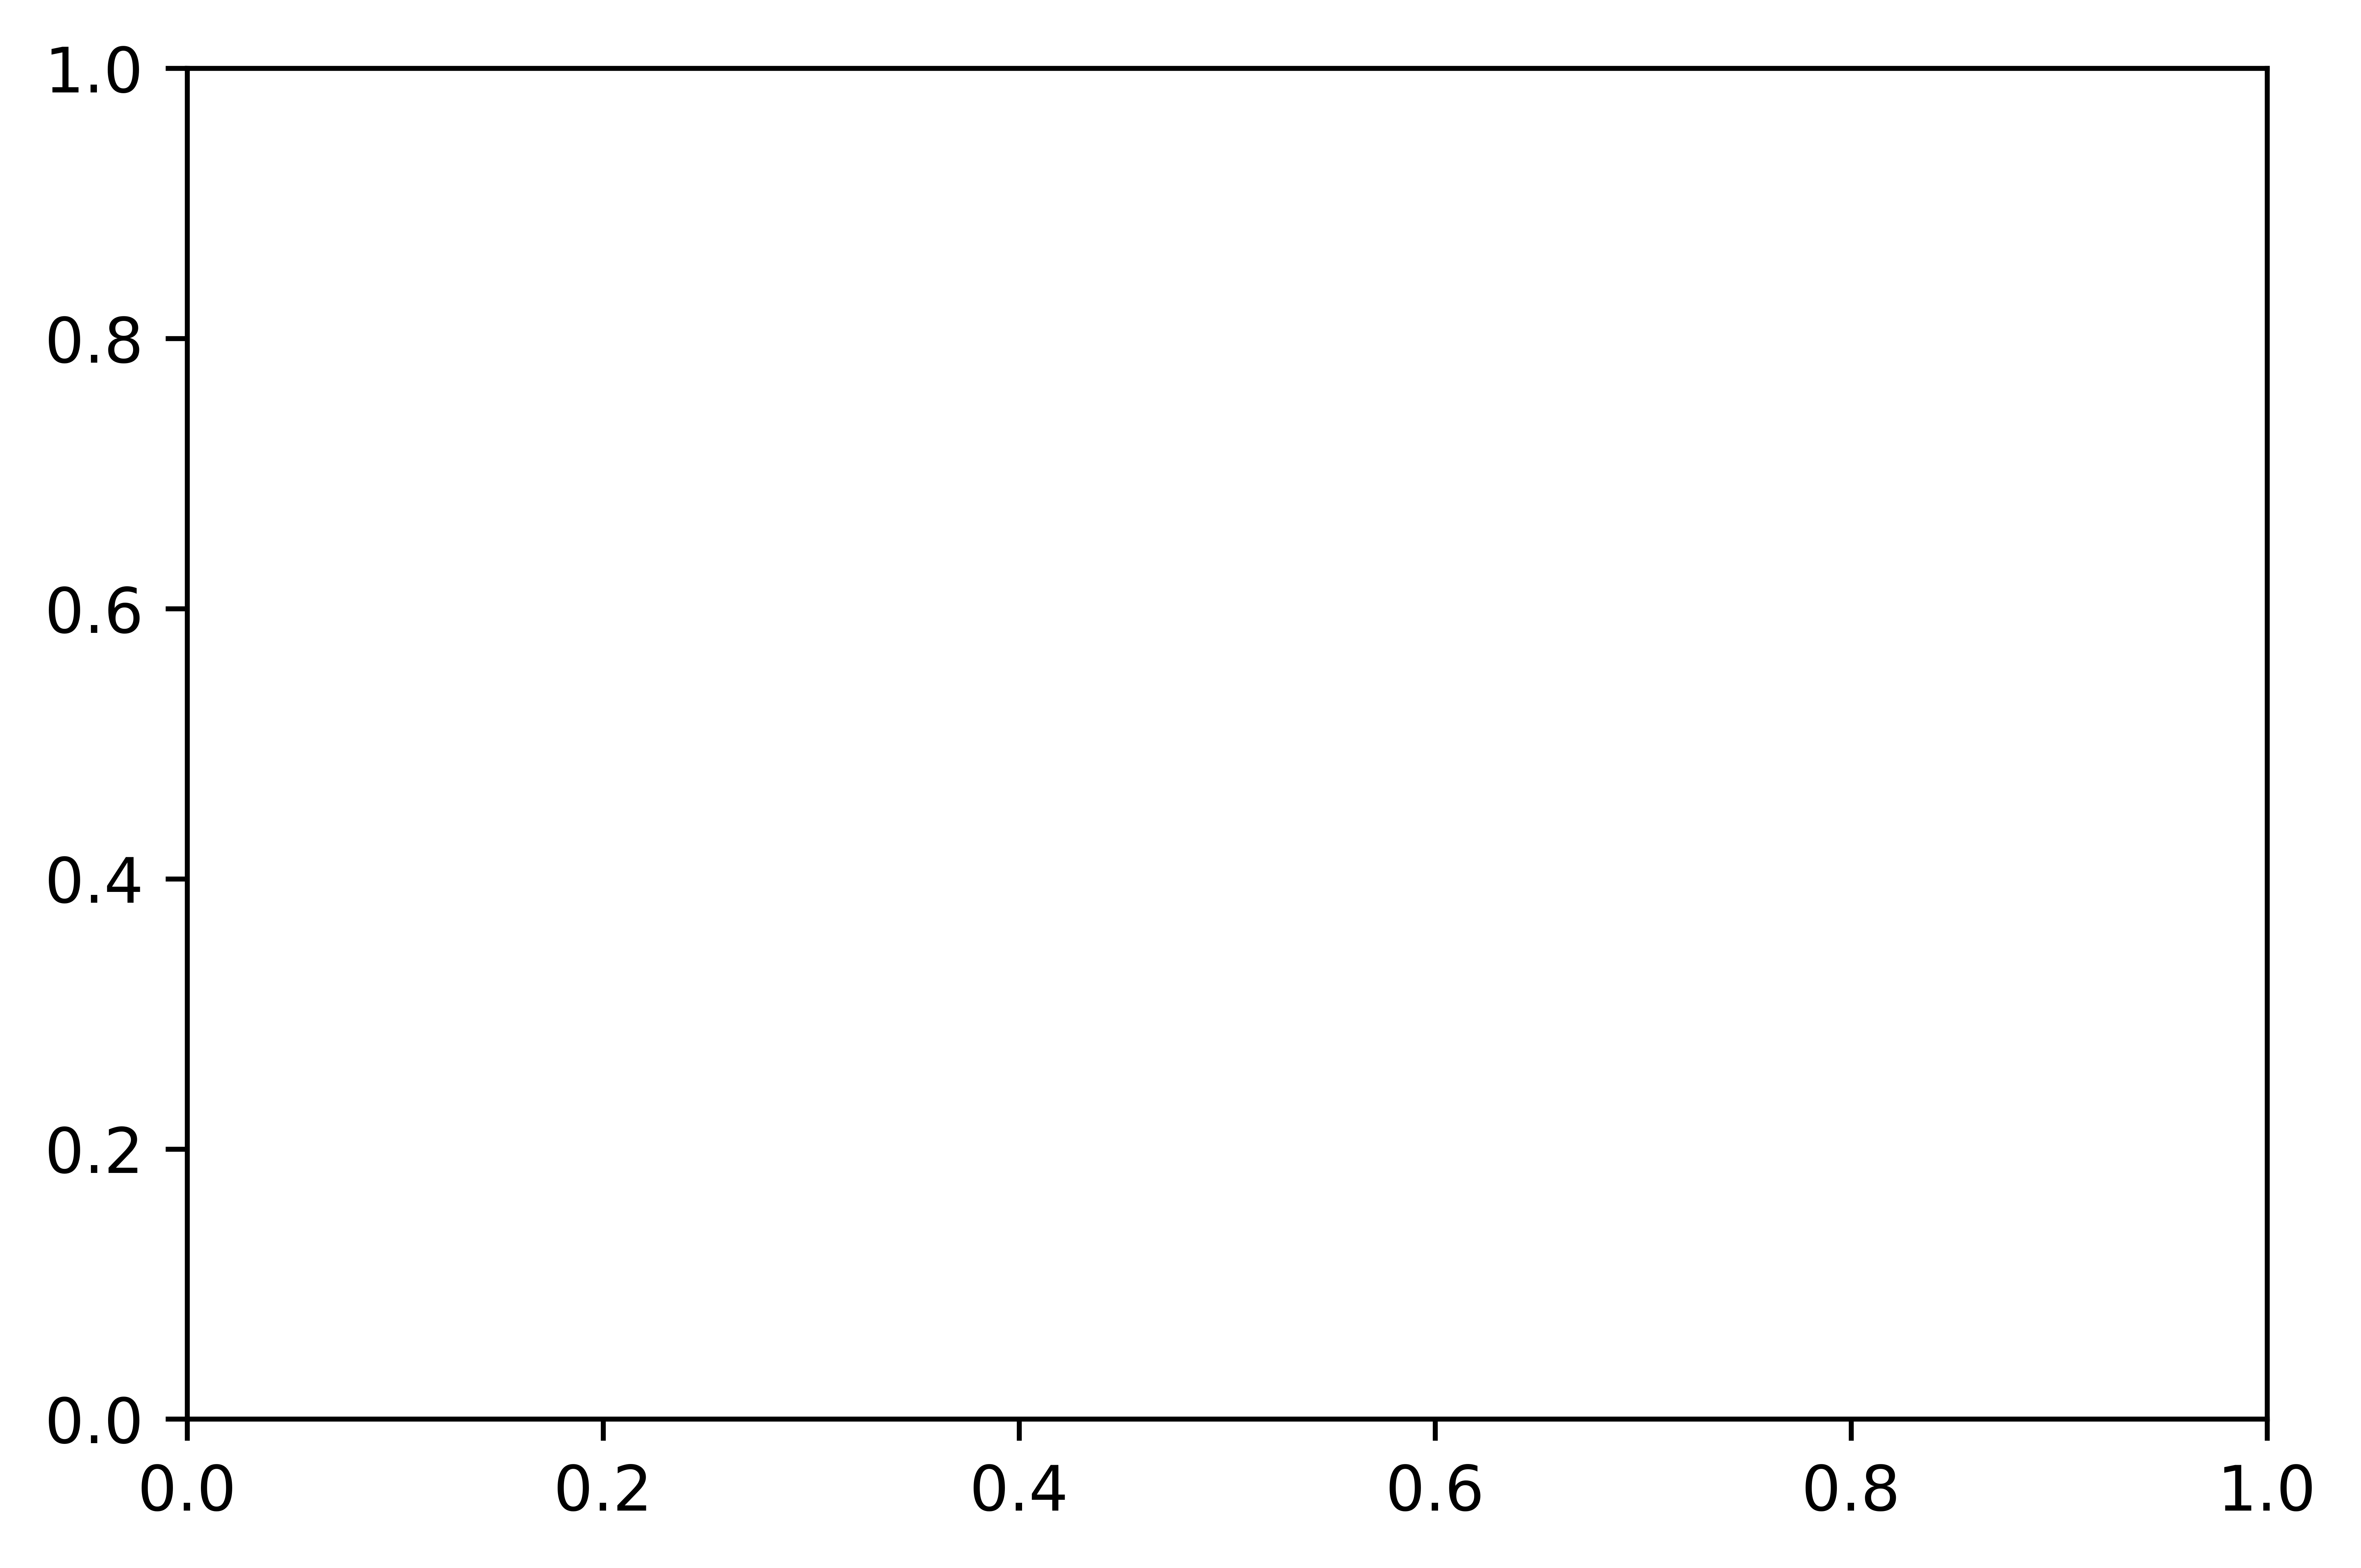

In [5]:
from matplotlib.collections import LineCollection
%matplotlib inline
def plot_grid(x,y, ax=None, **kwargs):
    ax = ax or plt.gca()
    segs1 = np.stack((x,y), axis=2)
    segs2 = segs1.transpose(1,0,2)
    ax.add_collection(LineCollection(segs1, **kwargs))
    ax.add_collection(LineCollection(segs2, **kwargs))
    ax.autoscale()
    
fig, ax = plt.subplots(dpi=1200)
n=10000
grid_x,grid_y = np.meshgrid(np.linspace(0e-9,0.0176,n),np.linspace(0e-9,0.0176,n))
#plot_grid(grid_x,grid_y, ax=ax,color='k',linewidths=0.15)

D_si=5
D_ac=10
D_ext=20

S_si=0.5
S_ac=1
#Dimensiones Capsula
r_ext=5.388e-5#[m]
r_in=2.694e-5#[m]

Z=(grid_x**2+grid_y**2<r_in**2)+(grid_x**2+grid_y**2<r_ext**2)*2


for i in range(len(cap_pos_x)):
    if i==0:
        D=((grid_x-cap_pos_x[i])**2+(grid_y-cap_pos_y[i])**2<r_in**2)*D_ac+((grid_x-cap_pos_x[i])**2+(grid_y-cap_pos_y[i])**2<r_ext**2)*D_si
        D=D-((grid_x-cap_pos_x[i])**2+(grid_y-cap_pos_y[i])**2<r_in**2)*D_si
    else:
        val=((grid_x-cap_pos_x[i])**2+(grid_y-cap_pos_y[i])**2<r_in**2)*D_ac+((grid_x-cap_pos_x[i])**2+(grid_y-cap_pos_y[i])**2<r_ext**2)*D_si
        val=val-((grid_x-cap_pos_x[i])**2+(grid_y-cap_pos_y[i])**2<r_in**2)*D_si
        D=D+val*(D==0)
D=D+(D==0)
S=(grid_x**2+grid_y**2<r_in**2)*S_ac+(grid_x**2+grid_y**2<r_ext**2)*S_si
S=S-(grid_x**2+grid_y**2<r_in**2)*S_si

a=ax.contourf(grid_x,grid_y,D)

# Make a colorbar for the ContourSet returned by the contourf call.
plt.colorbar(a)

In [7]:
#Condiciones calculo camino libre medio
P=74660.32 #Pa
T=298 #K

#Constantes 
R=8.314 #J/mol K
Na=6.022e23 
#Propiedades oxigeno
d_m=346e-12 #m diametro kinetico O_2
c=0.21*P/(R*T) #mol/m3 concentracion de oxigeno en el aire

#Camino libre medio 
lamnda=1/(np.sqrt(2)*np.pi*d_m**2*c*Na) #m

#Diametro de poro
sigma=36.96e-10 #m Tomado de Tesis Reynel Gomez (2018)

#numero de Knudsen
K_n=lamnda/sigma

#Dimensiones Capsula
r_ext=6.09e-8#[m]
r_in=3.394e-8#[m]

#Vector de radio discretizado
r=np.linspace(0,r_ext,n)
delta_r=r[1];

#Funcion Escalon 
H=(r_in<r).astype(int);
frontera=np.ravel(np.asarray(H==1).nonzero())[0]

#Propiedades oxigeno
M=32e-3 #Kg/mol

#Propiedades Membrana 
vol_capsula=(4/3)*np.pi*(121e-7/2)**3 #cm3
peso_capsula=3.52E-16#g
vol_total=vol_capsula/peso_capsula
vol_poro=0.7183 #cm3/g

E=vol_poro/vol_total #Porosidad 
t_2=E**(1-1.5) #Tortuosidad 

#Calculo difusividad
def dif_knudsen(T=298):
    Ko=1/3 *d_m*E/t_2;
    v=np.sqrt(8*R*T/(np.pi*M))
    D_k=Ko*v
    return D_k

#Difusividad y solubilidad de oxigeno en aceite
def Difusividad(T=298):
    R=8.314
    Dac=0.4e-9 #m2/s
    D_k=dif_knudsen(T) #m2/s
    D_pol=0.43e-4*np.exp(-36581.6/(R*T))
    return D_k,Dac,D_pol

def Solubilidad(T=298):
    R=8.314;
    Sac=6.858e6*np.exp(-1.478e4/(R*T)); #Pa m3/mol
    S_sol=2.0962E-5*np.exp(-1700/(R*T))
    return 1/(R*T),1/Sac,S_sol

def cons_cinetica(T=298):
    R=8.314;
    return np.asarray([52691244*np.exp(-101.5e3/(R*T)),6581,572.68*np.exp(-31e3/(R*T)),2.2914e+08,10362358.9,96814085.92*np.exp(-48.4e3/(R*T))])

plt.imshow(D)


In [8]:
from matplotlib import animation, rc
from IPython.display import HTML
import matplotlib.pyplot as plt

%matplotlib inline
D_si,D_ac,D_pol=Difusividad()
S_si,S_ac,S_pol=Solubilidad()

O2o=0;
ROOH_o=19.1789709;
RH_o=1559.37052;

for i in range(len(cap_pos_x)):
    if i==0:
        D=((grid_x-cap_pos_x[i])**2+(grid_y-cap_pos_y[i])**2<r_in**2)*D_ac+((grid_x-cap_pos_x[i])**2+(grid_y-cap_pos_y[i])**2<r_ext**2)*D_si
        D=D-((grid_x-cap_pos_x[i])**2+(grid_y-cap_pos_y[i])**2<r_in**2)*D_si
        S=((grid_x-cap_pos_x[i])**2+(grid_y-cap_pos_y[i])**2<r_in**2)*S_ac+((grid_x-cap_pos_x[i])**2+(grid_y-cap_pos_y[i])**2<r_ext**2)*S_si
        S=S-((grid_x-cap_pos_x[i])**2+(grid_y-cap_pos_y[i])**2<r_in**2)*S_si
        ROOH_inicial=((grid_x-cap_pos_x[i])**2+(grid_y-cap_pos_y[i])**2<r_in**2)*ROOH_o
        RH_inicial=((grid_x-cap_pos_x[i])**2+(grid_y-cap_pos_y[i])**2<r_in**2)*RH_o
    else:
        val=((grid_x-cap_pos_x[i])**2+(grid_y-cap_pos_y[i])**2<r_in**2)*D_ac+((grid_x-cap_pos_x[i])**2+(grid_y-cap_pos_y[i])**2<r_ext**2)*D_si
        val=val-((grid_x-cap_pos_x[i])**2+(grid_y-cap_pos_y[i])**2<r_in**2)*D_si
        D=D+val*(D==0)
        val_s=((grid_x-cap_pos_x[i])**2+(grid_y-cap_pos_y[i])**2<r_in**2)*S_ac+((grid_x-cap_pos_x[i])**2+(grid_y-cap_pos_y[i])**2<r_ext**2)*S_si
        val_s=val_s-((grid_x-cap_pos_x[i])**2+(grid_y-cap_pos_y[i])**2<r_in**2)*S_si
        S=S+val_s*(S==0)
        val_ROOH=((grid_x-cap_pos_x[i])**2+(grid_y-cap_pos_y[i])**2<r_in**2)*ROOH_o
        ROOH_inicial=ROOH_inicial+val_ROOH*(ROOH_inicial)
        val_RH=((grid_x-cap_pos_x[i])**2+(grid_y-cap_pos_y[i])**2<r_in**2)*RH_o
        RH_inicial=RH_inicial+val_RH*(RH_inicial)
        
D=D+(D==0)*D_pol
S=S+(S==0)*S_pol
k=cons_cinetica()
dx=0.0176*1e-2/10000
#dx=np.linspace(0,0.0176*1e-2,n)[1]
mesh = Grid2D(nx=n, ny=n, dx=dx, dy=dx)


O2 = CellVariable(name=r"$O_2$", mesh=mesh,hasOld=True)
O2.constrain(0.21*P, where=mesh.facesLeft)
ROOH = CellVariable(name=r"$ROOH$", mesh=mesh,hasOld=True)
RH = CellVariable(name=r"$RH$", mesh=mesh,hasOld=True)
ROO = CellVariable(name=r"$ROO\cdot$", mesh=mesh,hasOld=True)
R_reac = CellVariable(name=r"$R\cdot$", mesh=mesh,hasOld=True)


#O2_inicial=(grid_x**2+grid_y**2>r_ext**2)*O2o


#O2.value=np.reshape(O2_inicial,n*n);
ROOH.value=np.reshape(ROOH_inicial,n*n);
RH.value=np.reshape(RH_inicial,n*n);


D1=CellVariable(mesh=mesh, value=np.reshape(D,n*n))
S1=CellVariable(mesh=mesh, value=np.reshape(S,n*n))

elapsed = 0
fig=plt.figure(dpi=300)
fig.suptitle('t = %.2g' %(elapsed), fontsize=16)
#viewer_def=MultiViewer(viewers=(MatplotlibViewer(vars=O2,datamin=0,datamax=O2o,axes=fig.add_subplot(121)),(MatplotlibViewer(vars=O2*S1,axes=fig.add_subplot(122),datamin=0,datamax=O2o*S_si,))) )
viewer_def =MultiViewer(viewers=(MatplotlibViewer(vars=O2,datamin=0,datamax=O2o,axes=fig.add_subplot(111))))

KeyboardInterrupt: 

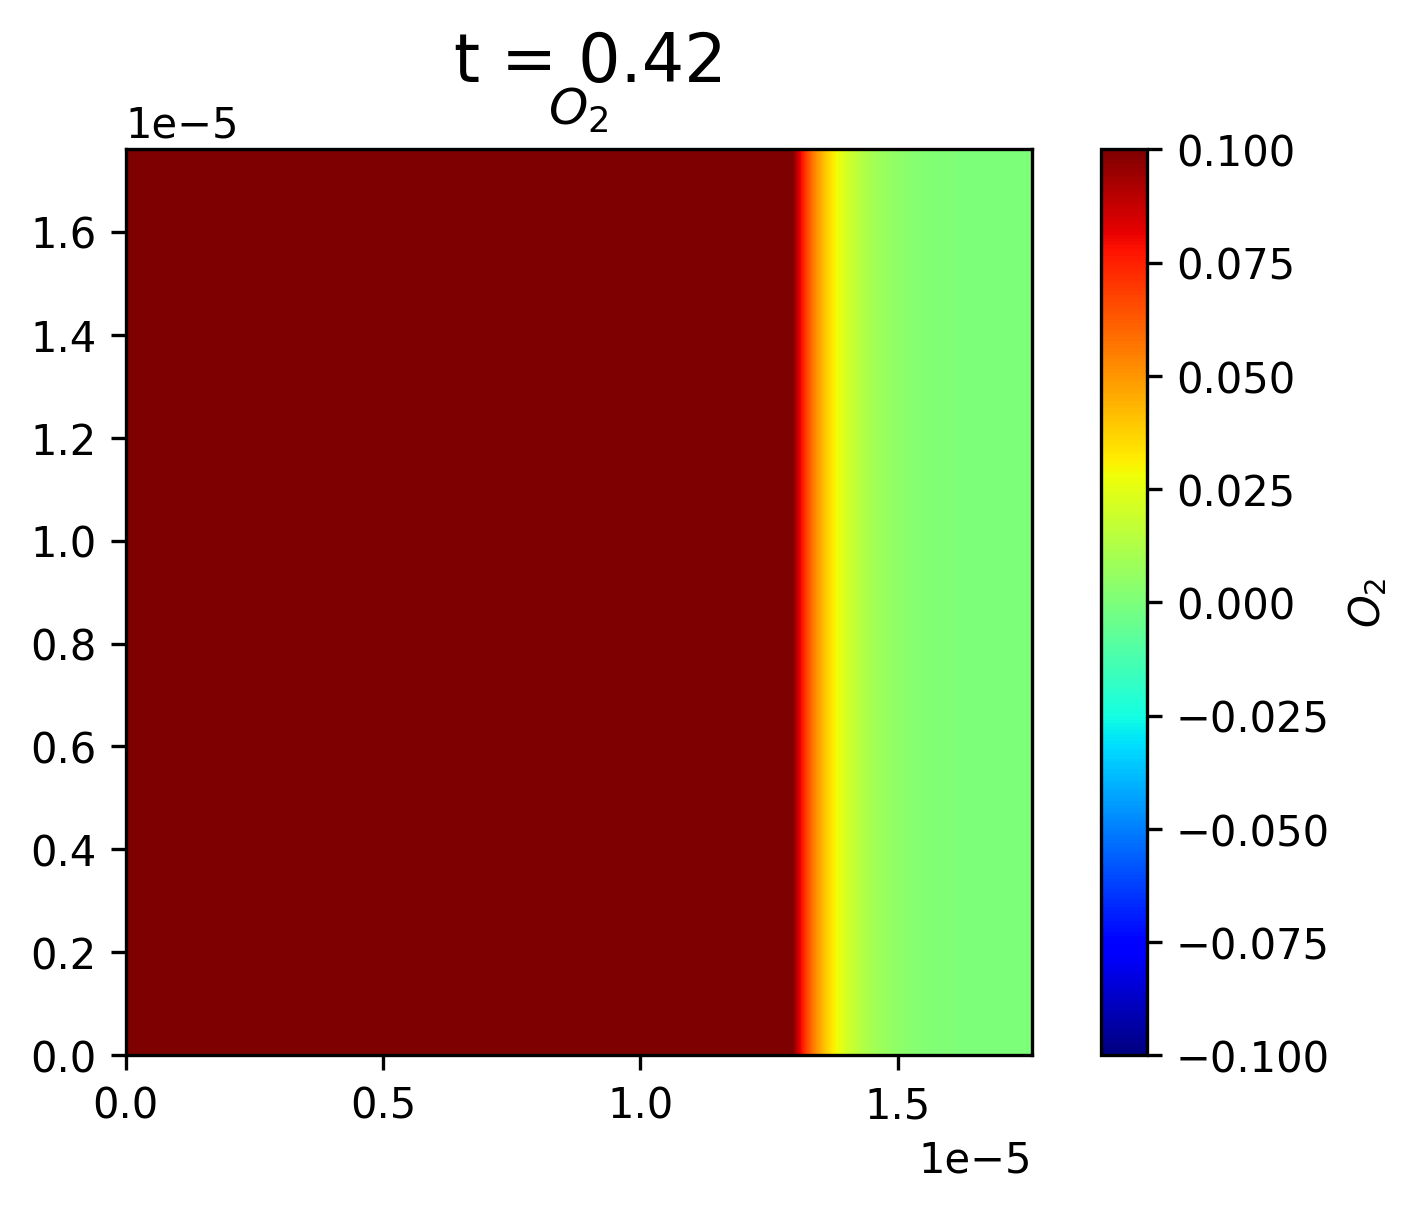

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

In [110]:
reacc_1=k[0]*ROOH
reacc_2=k[1]*O2*S1
reacc_2_alt=k[1]*R_reac
reacc_3=k[2]*RH
reacc_4=k[3]*R_reac
reacc_5=k[4]*R_reac
reacc_6=k[5]*ROO


eqn0= (TransientTerm(var=O2) == DiffusionTerm(coeff=D1,var=O2)-ImplicitSourceTerm(coeff=reacc_2_alt,var=O2))
eqn1= (TransientTerm(var=ROOH) == -2*ImplicitSourceTerm(coeff=reacc_1,var=ROOH)+ImplicitSourceTerm(coeff=reacc_3,var=ROO))
eqn2= (TransientTerm(var=ROO) == ImplicitSourceTerm(coeff=reacc_1,var=ROOH)+ImplicitSourceTerm(coeff=reacc_2, var=R_reac)-ImplicitSourceTerm(coeff=reacc_3,var=ROO)-ImplicitSourceTerm(coeff=reacc_5, var=ROO)-2*ImplicitSourceTerm(coeff=reacc_6, var=ROO))
eqn3= (TransientTerm(var=R_reac) == ImplicitSourceTerm(coeff=reacc_1,var=ROOH)-ImplicitSourceTerm(coeff=reacc_2, var=R_reac)+ImplicitSourceTerm(coeff=reacc_3,var=ROO)-2*ImplicitSourceTerm(coeff=reacc_4, var=R_reac)-ImplicitSourceTerm(coeff=reacc_5, var=ROO))
eqn4= (TransientTerm(var=RH) == -ImplicitSourceTerm(coeff=reacc_3,var=ROO))

eq = eqn0 & eqn1 & eqn2 &  eqn3 &  eqn4
dexp = -5
elapsed = 0


while elapsed < 3600*4:
    dt = min(100, np.exp(dexp))
    elapsed += dt
    dexp += 0.01
   
    elapsed += dt
    
    O2.updateOld()
    ROOH.updateOld()
    ROO.updateOld()
    R_reac.updateOld()
    RH.updateOld()
    
    eq.solve(dt=dt)
    viewer_def.plot()
    fig.suptitle('t = %.2g' %(elapsed), fontsize=16)
    

<Figure size 1800x1200 with 0 Axes>

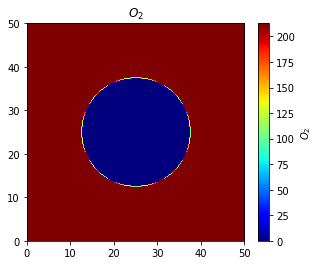

In [20]:
%matplotlib inline

mesh = Grid2D(nx=n, ny=n, dx=0.25, dy=0.25)
O2 = CellVariable(name=r"$O_2$", mesh=mesh,hasOld=True)
reactivo = CellVariable(name=r"$react$", mesh=mesh,hasOld=True)
P=101325
T=298

#Funcion Difusividad
D=Difusividad(T)
S=Solubilidad(T)

O2o=0.21*P*0.01;
no=10;
O2_inicial=(grid_x**2+grid_y**2>r_ext**2)*O2o
reactivo_inicial=(grid_x**2+grid_y**2<r_in**2)*no
O2.value=np.reshape(O2_inicial,n*n);
reactivo.value=np.reshape(reactivo_inicial,n*n);

fig=plt.figure(dpi=300)
viewer = Viewer(vars=(O2))
#viewer_1 = Viewer(vars=(reactivo),datamin=0,datamax=no)

#viewer_def=MultiViewer(viewers=(MatplotlibViewer(vars=O2,datamin=0,datamax=O2o,axes=fig.add_subplot(121)),MatplotlibViewer(vars=reactivo,datamin=0,datamax=no,axes=fig.add_subplot(122))))                                                  

In [149]:
D_poly=1
D_sili=2
D_aceite=3
r_sili=35
n=100001

grid=np.linspace(0,100000,n)
#grid_x,grid_y = np.meshgrid(np.linspace(0,100000,n),np.linspace(0,100000,n))
D=1
for i in range(0,len(cap_pos_x)):
    D=(-D_poly+D_sili)*((grid_x-cap_pos_x[i])**2+(grid_y-cap_pos_y[i])**2)<r_sili**2
    print(D[D==True])
fig, ax = plt.subplots();
a=ax.contourf(grid_x,grid_y,D)
print(D)

[ True]
[]
[]
[]
[ True]
[]
[]
[]
[]
[]
[ True]
[]
[ True]
[ True]
[ True]
[]
[]
[]
[ True]
[ True]
[]
[]
[]
[ True]
[ True]
[]
[]
[]
[ True]
[]
[]
[ True]
[ True]
[]
[]
[ True]
[]
[]
[ True]
[]
[]
[ True]
[ True]
[]
[ True]
[]
[ True]
[ True]
[ True]
[ True]
[ True]
[]
[]
[]
[]
[]
[ True]
[]
[]
[]
[]
[]
[]
[ True]
[ True]
[]
[]
[]
[ True]
[]
[ True]
[]
[]
[ True]
[ True]
[ True]
[]
[ True]
[]
[]
[]
[]
[]
[]
[]
[]
[ True]
[ True]
[ True]
[]
[]
[ True]
[]
[ True]
[]
[ True]
[]
[]
[]
[ True]
[ True]
[]
[]
[]
[]
[ True]
[ True]
[]
[]
[]
[]
[]
[ True]
[]
[]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[]
[]
[]
[]


KeyboardInterrupt: 

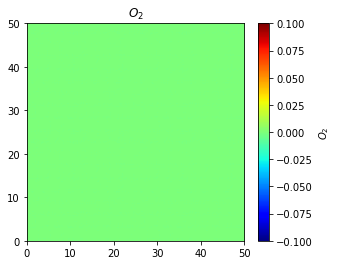

0.04052893674598971


KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

In [21]:
#PHI = phi.getArithmeticFaceValue()
D_si=5e-4
D_ac=10e-4
D_ext=20e-4

S_si=0.5
S_ac=1

Z=(grid_x**2+grid_y**2<0.5**2)+(grid_x**2+grid_y**2<0.8**2)*2


D=(grid_x**2+grid_y**2<r_in**2)*D_ac+(grid_x**2+grid_y**2<r_ext**2)*D_si+(grid_x**2+grid_y**2>r_ext**2)*D_ext
D=D-(grid_x**2+grid_y**2<r_in**2)*D_si

D1 = CellVariable(mesh=mesh, value=0)
D1.setValue(np.reshape(D,n*n))

eq = (TransientTerm() == DiffusionTerm(coeff=D1))
dexp = -5
elapsed = 0.
while elapsed < 1:
    dt = min(100, np.exp(dexp))
    elapsed += dt
    dexp += 0.001
    eq.solve(O2, dt=dt)
    print(elapsed)
    viewer.plot()


In [22]:
#PHI = phi.getArithmeticFaceValue()
D_si=5
D_ac=10
D_ext=20

k=6581;
S_si=0.5
S_ac=1

Z=(grid_x**2+grid_y**2<0.5**2)+(grid_x**2+grid_y**2<0.8**2)*2


D=(grid_x**2+grid_y**2<0.5**2)*D_ac+(grid_x**2+grid_y**2<0.8**2)*D_si+(grid_x**2+grid_y**2>0.8**2)*D_ext
D=D-(grid_x**2+grid_y**2<0.5**2)*D_si

D1 = CellVariable(mesh=mesh, value=0)
D1.setValue(np.reshape(D,100*100))

coeff_1= -k*O2
coeff_2= -k*reactivo
eqn0= (TransientTerm(var=O2) == DiffusionTerm(coeff=D1,var=O2)+ImplicitSourceTerm(coeff=coeff_2,var=O2))
eqn1= (TransientTerm(var=reactivo) == ImplicitSourceTerm(coeff=coeff_1,var=reactivo))
eq = eqn0 & eqn1
dexp = -5
elapsed = 0.
while elapsed < 10:
    dt = min(100, np.exp(dexp))
    elapsed += dt
    dexp += 0.01
    O2.updateOld()
    reactivo.updateOld()
    eq.solve(dt=dt)
    print(elapsed)
    viewer_def.plot()

    

ValueError: cannot reshape array of size 40000 into shape (10000,)

In [ ]:
while elapsed < 35:
    dt = min(100, np.exp(dexp))
    elapsed += dt
    dexp += 0.01
    O2.updateOld()
    reactivo.updateOld()
    eq.solve(dt=dt)
    print(elapsed)
    viewer_def.plot()

In [32]:
%matplotlib inline

reacc_1=k[0]*ROOH
reacc_2=k[1]*O2*S1
reacc_2_alt=k[1]*R_reac
reacc_3=k[2]*RH
reacc_4=k[3]*R_reac
reacc_5=k[4]*R_reac
reacc_6=k[5]*ROO


eqn0= (TransientTerm(var=O2) == DiffusionTerm(coeff=D1,var=O2)-ImplicitSourceTerm(coeff=reacc_2_alt,var=O2))
eqn1= (TransientTerm(var=ROOH) == -2*ImplicitSourceTerm(coeff=reacc_1,var=ROOH)+ImplicitSourceTerm(coeff=reacc_3,var=ROO))
eqn2= (TransientTerm(var=ROO) == ImplicitSourceTerm(coeff=reacc_1,var=ROOH)+ImplicitSourceTerm(coeff=reacc_2, var=R_reac)-ImplicitSourceTerm(coeff=reacc_3,var=ROO)-ImplicitSourceTerm(coeff=reacc_5, var=ROO)-2*ImplicitSourceTerm(coeff=reacc_6, var=ROO))
eqn3= (TransientTerm(var=R_reac) == ImplicitSourceTerm(coeff=reacc_1,var=ROOH)-ImplicitSourceTerm(coeff=reacc_2, var=R_reac)+ImplicitSourceTerm(coeff=reacc_3,var=ROO)-2*ImplicitSourceTerm(coeff=reacc_4, var=R_reac)-ImplicitSourceTerm(coeff=reacc_5, var=ROO))
eqn4= (TransientTerm(var=RH) == -ImplicitSourceTerm(coeff=reacc_3,var=ROO))

eq = eqn0 & eqn1 & eqn2 &  eqn3 &  eqn4
dexp = -5
elapsed = 0


while elapsed < 3600*4:
    dt = min(100, np.exp(dexp))
    elapsed += dt
    dexp += 0.01
   
    elapsed += dt
    
    O2.updateOld()
    ROOH.updateOld()
    ROO.updateOld()
    R_reac.updateOld()
    RH.updateOld()
    
    eq.solve(dt=dt)
    viewer_def.plot()
    fig.suptitle('t = %.2g' %(elapsed), fontsize=16)
    
    



KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

In [ ]:
fig

In [ ]:
D_si

In [ ]:
D_ac

In [ ]:
plt.imshow(np.reshape(D1.value,[50,50]))

In [ ]:
plt.imshow(D)

In [ ]:
Solubilidad()

In [ ]:
fig, ax = plt.subplots()
a=ax.contourf(grid_x,grid_y,D)
plt.colorbar(a)

In [ ]:
for i in D:print(i)

In [ ]:
fig

In [ ]:
from IPython.display import display
display(fig)

In [ ]:
    viewer_def.plot()
    display(fig)

In [ ]:
t=[0.00000000e+00, 1.22002745e-08, 2.44005490e-08, 1.46403294e-07,
       2.68406039e-07, 7.57202671e-07, 1.24599930e-06, 1.73479594e-06,
       3.61974000e-06, 5.50468406e-06, 7.38962812e-06, 1.25037076e-05,
       1.76177871e-05, 2.27318666e-05, 2.78459461e-05, 3.64037229e-05,
       4.49614996e-05, 5.35192764e-05, 6.20770532e-05, 7.75283703e-05,
       9.29796874e-05, 1.08431005e-04, 1.23882322e-04, 1.49609181e-04,
       1.75336041e-04, 2.01062901e-04, 2.26789760e-04, 2.68263122e-04,
       3.09736483e-04, 3.51209845e-04, 3.92683206e-04, 4.60985957e-04,
       5.29288707e-04, 5.97591458e-04, 6.65894209e-04, 7.55162032e-04,
       8.44429856e-04, 9.33697679e-04, 1.02296550e-03, 1.11223333e-03,
       1.27060508e-03, 1.42897684e-03, 1.58734859e-03, 1.74572035e-03,
       2.00854130e-03, 2.27136225e-03, 2.53418320e-03, 2.79700416e-03,
       3.05982511e-03, 3.82490416e-03, 4.58998321e-03, 5.35506226e-03,
       6.12014131e-03, 6.95977100e-03, 7.79940070e-03, 8.63903040e-03,
       9.47866009e-03, 1.03182898e-02, 1.27937015e-02, 1.43110298e-02,
       1.58283582e-02, 1.73456865e-02, 1.88630149e-02, 2.03803432e-02,
       2.38569759e-02, 2.73336086e-02, 3.08102413e-02, 3.42868740e-02,
       4.97359676e-02, 6.51850612e-02, 8.06341548e-02, 2.35125091e-01,
       3.89616027e-01, 1.08511126e+00, 1.78060648e+00, 8.73555877e+00,
       1.56905111e+01, 8.52400339e+01, 1.54789557e+02, 8.50284785e+02,
       1.54578001e+03, 8.50073230e+03, 1.44000000e+04]

In [ ]:
len(t)

In [ ]:
HTML(anim.to_html5_video())

In [ ]:
display(anim)

In [ ]:
t

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
#anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])
from IPython.display import display
display(anim)

In [ ]:
anim